<a href="https://colab.research.google.com/github/sdi2100071/2021-project-1/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[ 10.63415642 -10.31804897  -3.91323692  13.47455445  12.00245098
   7.01459213 -11.5083141    7.83875    -11.21021617   6.95282804
   7.79101979  13.94835343   3.01243432  11.67679791  13.41197807
  14.61995534  -8.70743264 -14.10312612 -11.68244994  14.75202699
   9.25316629  -4.82661632  -6.99915042   6.49562369 -11.46126563
  -9.38897405  -3.68953244  -5.95603391 -10.80285714 -11.78004227]


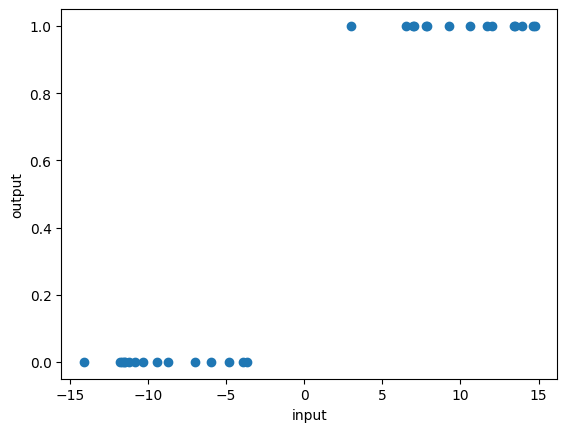

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import os

data1 = np.array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])



# print(data1[0])

data1_input = data1[0]
data1_output = data1[1]

plt.scatter(data1_input, data1_output)
plt.xlabel("input")
plt.ylabel("output")
plt.show()



In [51]:
def f1(x, w):

    exponent = -(w[0] + w[1]*x)

    a = np.exp(exponent)
    b = 1 + a
    res = 1 / b

    print(res)
    return res


def sigma(x):
  if x.all() > 0:
    return x

  return  0

def f2(w, x):
  return w[0] + w[1]*sigma(w[2] + w[3]*x)


# def L1(w, x , y, n):
#   for i in range(1, n):
#     print("i is ---" ,i)
#     a = y[i] * math.log2(f1(x[i],w))
#     b = (1 - y[i]) * math.log2(1 - f1(x[i], w))
#     sum = a + b
#   return sum*(1/n)

def L2(w, x, y, n):

  sum = 0
  for i in range(1, n):

    a = (y[i] - f2(x, w))
    sum += a * a
  return sum *(1/n)


  # Συναρτήσεις ενεργοποίησης και τα παράγωγά τους
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def step_function(x):
    return np.where(x > 0, x, 0)

def step_function_derivative(x):
    return np.where(x > 0, 1, 0)

# Συναρτήσεις κόστους και οι παράγωγοι τους
def L1_derivative_w0(x, y, w):
    n = len(y)
    f1 = sigmoid(-(w[0] + w[1] * x))
    return (1/n) * np.sum((f1 - y) * sigmoid_derivative(w[0] + w[1] * x))

def L1_derivative_w1(x, y, w):
    n = len(y)
    f1 = sigmoid(-(w[0] + w[1] * x))
    return (1/n) * np.sum((f1 - y) * x * sigmoid_derivative(w[0] + w[1] * x))

def L2_derivative_w0(x, y, w):
    n = len(y)
    f2 = w[0] + w[1] * step_function(w[2] + w[3] * x)
    return (-2/n) * np.sum((y - f2))

def L2_derivative_w1(x, y, w):
    n = len(y)
    f2 = w[0] + w[1] * step_function(w[2] + w[3] * x)
    return (-2/n) * np.sum((y - f2) * step_function(w[2] + w[3] * x))

def L2_derivative_w2(x, y, w):
    n = len(y)
    f2 = w[0] + w[1] * step_function(w[2] + w[3] * x)
    return (-2/n) * np.sum((y - f2) * w[1] * step_function_derivative(w[2] + w[3] * x))

def L2_derivative_w3(x, y, w):
    n = len(y)
    f2 = w[0] + w[1] * step_function(w[2] + w[3] * x)
    return (-2/n) * np.sum((y - f2) * w[1] * step_function_derivative(w[2] + w[3] * x) * x)

# Συναρτήσεις κόστους
def L1(w0, w1, x, y):
    n = len(y)
    f1 = sigmoid(w0 + w1 * x)
    cost = - (1/n) * np.sum(y * np.log2(f1) + (1 - y) * np.log2(1 - f1))
    return cost





Estimated Weight: 1.001903508941703
Estimated Bias: -3.4039293342644565e-05


Text(0, 0.5, 'Y')

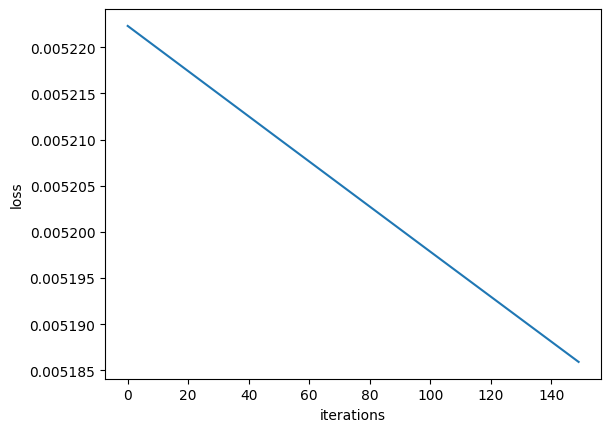

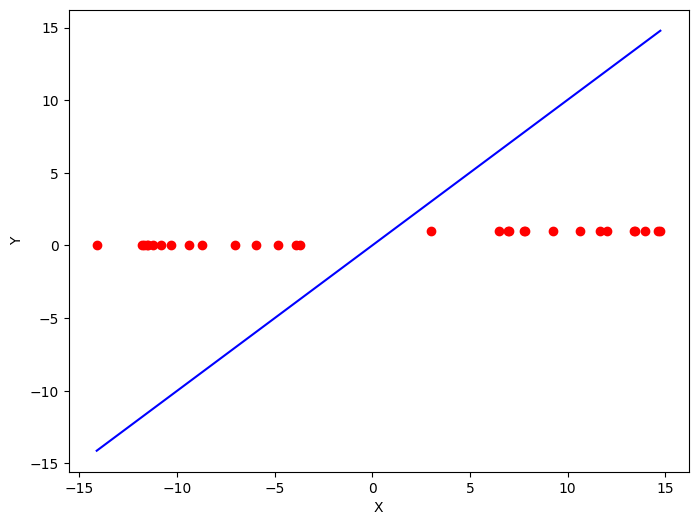

In [77]:
learning_rate = math.pow(10, -3)

#orismos parametrwn
w_f1 = np.array([0,1])
w_f2 = np.array([0.5, 1, 2.2 , 3.4])
T = 150

x = data1[0]
y = data1[1]

# def df1(x, w):
#   a = w[1] * math.exp(-x*w[1] - w[0])
#   b = (math.exp(-x*w[1] - w[0]) + 1) * (math.exp(-x*w[1] - w[0]) + 1)
#   return a/b


def gradient_descent(x, y, w, l, dlw1, dlw0, T , learning_rate = 0.001):


    costList = []
    y_predList = []

    w0 = w[0]
    w1 = w[1]
    for i in range(T):


        n  = float(len(x))
        ypred = sigmoid(-(w0 + w1 * x))
        y_predList.append(ypred)



        # Calculating the gradients
        w1_derivative = dlw1(x, y, w)
        w0_derivative = dlw0(x, y, w)

        # Updating weights and bias
        w1 = w1 - (learning_rate * w1_derivative)
        w0 = w0 - (learning_rate * w0_derivative)


        cost = l(w0, w1, x, y)
        # print(cost)
        costList.append(cost)

        # Printing the parameters for each 1000th iteration
        #print(f"Iteration {i+1}: Weight  {w1}, Bias {w0}")

    return w1, w0, costList, y_predList

# print(x, y)
curX = 0
estimated_weight, estimated_bias, cost, y_pred = gradient_descent(x, y, w_f1, L1, L1_derivative_w1, L1_derivative_w0, T , learning_rate = 0.001)

print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

iterations = [i for  i in range(T)]
# print(iterations)

# print(len(cost))

# plt.figure(figsize = (8,6))
# # plt.scatter(iterations, cost, marker='o', color='red')
# plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
#           markersize=10,linestyle='dashed')
# plt.xlabel("X")
# plt.ylabel("Y")

plt.plot(iterations, cost)

# naming the x axis
plt.xlabel("iterations" )
# naming the y axis
plt.ylabel("loss")

Y_pred = estimated_weight*x + estimated_bias


plt.figure(figsize = (8,6))
plt.scatter(x, y, marker='o', color='red')
plt.plot([min(x),max(x)], [min(Y_pred),max(Y_pred)], color='blue',markerfacecolor='red',
          markersize=10)
plt.xlabel("X")
plt.ylabel("Y")


#print(df1(x[0], w_f1))
